<a href="https://colab.research.google.com/github/diyosukma/CP68-SistemRekomendasi/blob/main/Rekomendasi_Ekstrakurikuler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laporan Capstone Project Team 68 - Rekomendasi Ekstrakurikuler

## Tema Proyek - Resource Sharing

## Business Understanding
Aplikasi ini dibuat untuk membantu para siswa SMA dalam menentukan kegiatan ekstrakurikuler. Sistem rekomendasi dimodelkan dengan metode Content-based Filtering, berdasarkan pengalaman-pengalaman para siswa SMA yang dulu pernah atau sekarang sedang mengikuti ekstrakurikuler. Sistem ini dibuat berdasarkan beberapa faktor yang berpengaruh.

### Latar Belakang
Peraturan [Permendikbud nomor 62 tahun 2014](https://jdih.kemdikbud.go.id/arsip/Permendikbud%20Nomor%2062%20Tahun%202014.pdf) tentang kegiatan ekstrakurikuler, menyebutkan bahwa setiap peserta didik memiliki hak mengikuti kegiatan ekstrakurikuler sesuai dengan minat dan bakat mereka. Penentuan pemilihan ekstrakurikuler berdasarkan minat dan bakat terjadi di Sekolah Menengah Atas (SMA) diserahkan sepenuhnya pada siswa. Menurut [Sari dan Simanjuntak (2020)](http://ejournal.upbatam.ac.id/index.php/comasiejournal/article/view/2141/1249) terkadang siswa cenderung bingung memilih ekstrakurikuler dikarenakan orang tua yang tidak suka dengan hobi anaknya atau siswa tersebut menganggap bahwa dirinya tidak sungguh-sungguh dengan hobi dan bakatnya. Maka dari itu dibangun sistem rekomendasi ekstrakurikuler pada siswa SMA dengan harapan membantu para siswa memilih ekstrakurikuler yang sesuai dengan mereka.

### Problem Statement
Bagaimana cara menentukan ekstrakurikuler yang sesuai dengan minat dan keadaan siswa SMA?

### Research Questions
Bagaimana cara membuat sistem rekomendasi ekstrakurikuler untuk anak SMA yang baik dan benar?
Apakah Metode Content-Based Filtering cocok digunakan untuk membuat sistem rekomendasi ekstrakurikuler ini?
Bagaimana hasil akurasi sistem rekomendasi yang dibuat?
Faktor apa yang berpengaruh dalam penentuan ekstrakurikuler siswa SMA?


## Data Understanding

Library yang dibutuhkan

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

### Data Loading

File yang akan digunakan adalah data hasil kuesioner mengenai hubungan ekstrakurikuler dan minat/bakat.

In [2]:
df = pd.read_excel('data_ekstrakurikuler.xlsx')
df

,Nama,Asal Sekolah,Sulit Memilih,Gender,Agama,Jurusan,Bidang Ekstrakurikuler,Pekerjaan Ibu,Pekerjaan Bapak,Sungguh Berkegiatan,Minat Bakat Tersalurkan,Alasan Memilih,Teman Berpengaruh,Lama Pertemuan,Banyak Pertemuan,Minat Bakat
0,Fahmi Nurfalah,SMA Negeri 5 Sukabumi,Tidak,Laki-laki,Islam,IPS,Kesenian,Ibu Rumah Tangga,Wiraswasta,Ya,Ya,Tekad dari diri sendiri,Ya,Lebih dari 1 Jam,2 Kali Seminggu,Cenderung menyukai untuk bekerja secara berkel...
1,Fahmi Nurfalah,SMA Negeri 5 Sukabumi,Tidak,Laki-laki,Islam,IPS,Olahraga,Ibu Rumah Tangga,Wiraswasta,Ya,Ya,Tekad dari diri sendiri,Ya,Lebih dari 1 Jam,2 Kali Seminggu,Cenderung menyukai untuk bekerja secara berkel...
2,Nur Asiah Ramdani,SMA Negeri 1 Kota Sukabumi,Tidak,Perempuan,Islam,IPA,Akademik & Kebahasaan,Ibu rumah tangga,PNS,Ya,Ya,Tekad dari diri sendiri,Ya,1 Jam,1 Kali Seminggu,"Menggemari kegiatan yang melibatkan tulisan, M..."
3,Mojang Rucita Wijaksana,SMAN 1CIBADAK,Tidak,Perempuan,Islam,IPA,Olahraga,PNS,PNS,Ya,Ya,Tekad dari diri sendiri,Tidak,Lebih dari 1 Jam,2 Kali Seminggu,Mempertimbangkan baik sisi plus ataupun minus ...
4,Mojang Rucita Wijaksana,SMAN 1CIBADAK,Tidak,Perempuan,Islam,IPA,Kesenian,PNS,PNS,Ya,Ya,Tekad dari diri sendiri,Tidak,Lebih dari 1 Jam,2 Kali Seminggu,Mempertimbangkan baik sisi plus ataupun minus ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,Alfi Rana Lawahizh,SMA 1 Semarang,Tidak,Perempuan,Islam,IPS,Lingkungan Hidup,IRT,Sopir,Ya,Ya,Tekad dari diri sendiri,Ya,Lebih dari 1 Jam,1 Kali Seminggu,Gemar menuangkan ide dalam bentuk tulisan atau...
289,Theodore Amadeus Pakpahan,SMA 1 Surakarta,Ya,Laki-laki,Kristen Protestan,IPA,Akademik & Kebahasaan,IRT,Karyawan perusahaan,Ya,Ya,Tekad dari diri sendiri,Ya,Lebih dari 1 Jam,2 Kali Seminggu,"Menggemari kegiatan yang melibatkan tulisan, M..."
290,Theodore Amadeus Pakpahan,SMA 1 Surakarta,Ya,Laki-laki,Kristen Protestan,IPA,IT,IRT,Karyawan perusahaan,Ya,Ya,Tekad dari diri sendiri,Ya,Lebih dari 1 Jam,2 Kali Seminggu,"Menggemari kegiatan yang melibatkan tulisan, M..."
291,Maria Adelia Tian Putri Kusuma,SMA 6 Jakarta,Ya,Perempuan,Kristen Katolik,IPA,Akademik & Kebahasaan,Ibu rumah tangga,Pegawai bank,Ya,Ya,Tekad dari diri sendiri,Ya,Lebih dari 1 Jam,1 Kali Seminggu,Gemar menuangkan ide dalam bentuk tulisan atau...


### Visualisasi Data

##### Sulit Memilih
Dari data yang diperoleh, banyak siswa yang kesulitan saat memilih ekstrakurikuler. Berikut visualisasinya. 

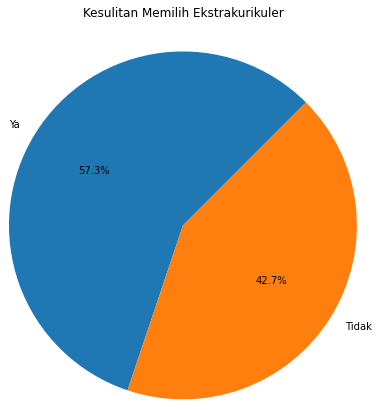

In [3]:
value_count_kesulitan = df['Sulit Memilih'].value_counts()

fig, ax = plt.subplots()
ax.pie([value_count_kesulitan['Ya'], 
        value_count_kesulitan['Tidak']], 
        labels=['Ya', 'Tidak'], autopct='%1.1f%%', startangle=45, radius=2)
ax.set_title("Kesulitan Memilih Ekstrakurikuler", pad=100)
plt.show()

#### Bidang Ekstrakurikuler
Bidang ekstrakurikuler yang paling banyak diminati.

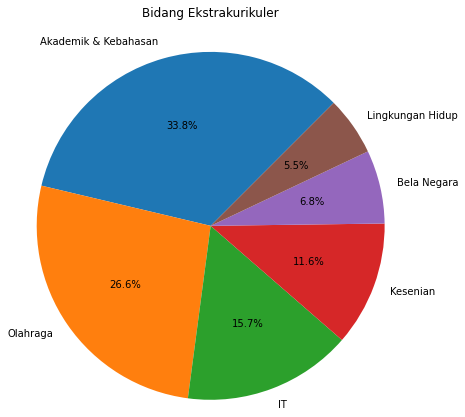

In [4]:
value_count_bidang = df['Bidang Ekstrakurikuler'].value_counts()

fig, ax = plt.subplots()
ax.pie([value_count_bidang['Akademik & Kebahasaan'], 
        value_count_bidang['Olahraga'], 
        value_count_bidang['IT'],
        value_count_bidang['Kesenian'],
        value_count_bidang['Bela Negara'],
        value_count_bidang['Lingkungan Hidup']],
        labels=['Akademik & Kebahasan', 'Olahraga', 'IT', 'Kesenian', 'Bela Negara', 'Lingkungan Hidup'], 
        autopct='%1.1f%%', startangle=45, radius=2)
ax.set_title("Bidang Ekstrakurikuler", pad=100)
plt.show()

#### Jurusan
Yang memilih ekstrakurikuler kebanyakan dari jurusan IPA.

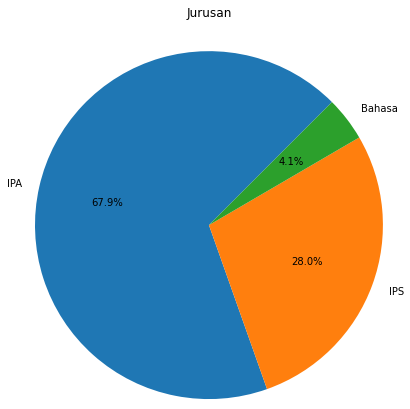

In [5]:
value_count_jurusan = df['Jurusan'].value_counts()

fig, ax = plt.subplots()
ax.pie([value_count_jurusan['IPA'], 
        value_count_jurusan['IPS'],
        value_count_jurusan['Bahasa']], 
        labels=['IPA', 'IPS', 'Bahasa'], autopct='%1.1f%%', startangle=45, radius=2)
ax.set_title("Jurusan", pad=100)
plt.show()

#### Alasan Memilih Ekstrakurikuler
Walaupun banyak yang merasa kesulitan dalam memilih ekstrakurikuler, namun banyak yang memilih ekstrakurikuler atas tekadnya sendiri diikuti dengan alasan pengaruh teman.

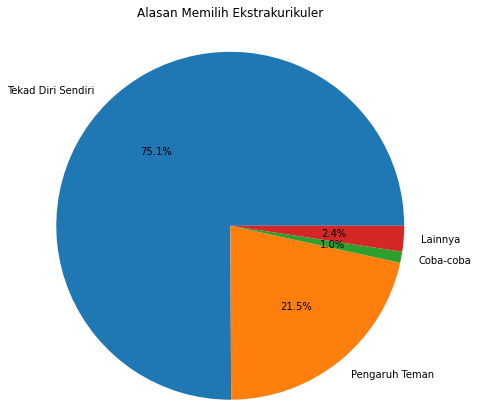

In [6]:
value_count_alasan = df['Alasan Memilih'].value_counts()

fig, ax = plt.subplots()
ax.pie([value_count_alasan[0], 
        value_count_alasan[1],
        value_count_alasan[2],
        value_count_alasan[3]+value_count_alasan[4]+value_count_alasan[5]+value_count_alasan[6]+value_count_alasan[7]], 
        labels=['Tekad Diri Sendiri', 'Pengaruh Teman', 'Coba-coba', 'Lainnya'], autopct='%1.1f%%', radius=2)
ax.set_title("Alasan Memilih Ekstrakurikuler", pad=100)
plt.show()

#### Teman Berpengaruh dalam Kegiatan Ekstarkurikuler
Walau saat memilih kebanyakan karena tekad diri sendiri, namun dalam berkegiatan teman berpengaruh besar.

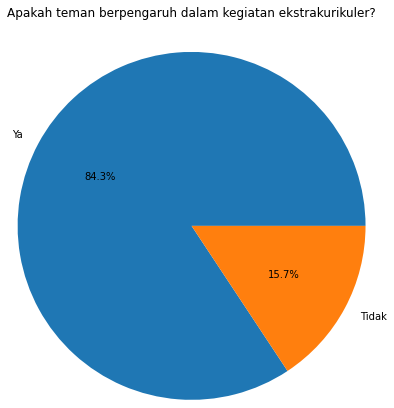

In [7]:
value_count_teman = df['Teman Berpengaruh'].value_counts()

fig, ax = plt.subplots()
ax.pie([value_count_teman['Ya'], 
        value_count_teman['Tidak']], 
        labels=['Ya', 'Tidak'], autopct='%1.1f%%', radius=2)
ax.set_title("Apakah teman berpengaruh dalam kegiatan ekstrakurikuler?", pad=100)
plt.show()

#### Gender
Kegiatan ekstrakurikuler hampir seimbang diikuti oleh perempuan dan laki-laki.

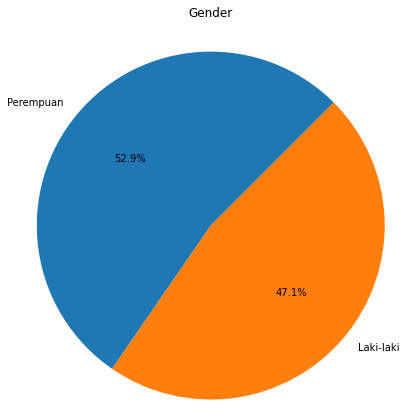

In [8]:
value_count_gender = df['Gender'].value_counts()

fig, ax = plt.subplots()
ax.pie([value_count_gender[0], 
        value_count_gender[1]], 
        labels=['Perempuan', 'Laki-laki'], autopct='%1.1f%%', startangle=45, radius=2)
ax.set_title("Gender", pad=100)
plt.show()

#### Kesungguhan dalam Ekstrakurikuler
Banyak siswa yang bersungguh-sungguh dalam mengikuti kegiatan ekstrakurikuler

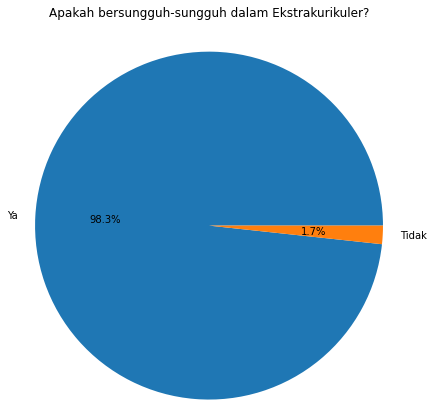

In [9]:
value_count_sungguh = df['Sungguh Berkegiatan'].value_counts()

fig, ax = plt.subplots()
ax.pie([value_count_sungguh['Ya'], 
        value_count_sungguh['Tidak']], 
        labels=['Ya', 'Tidak'], autopct='%1.1f%%', radius=2)
ax.set_title("Apakah bersungguh-sungguh dalam Ekstrakurikuler?", pad=100)
plt.show()

#### Minat Bakat Tersalurkan
Ekstrakurikuler terbukti dapat menyalurkan minat dan bakat siswa didasarkan dataset.

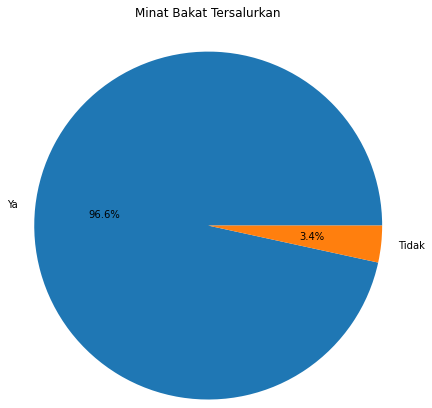

In [10]:
value_count_tersalurkan = df['Minat Bakat Tersalurkan'].value_counts()

fig, ax = plt.subplots()
ax.pie([value_count_tersalurkan['Ya'], 
        value_count_tersalurkan['Tidak']], 
        labels=['Ya', 'Tidak'], autopct='%1.1f%%', radius=2)
ax.set_title("Minat Bakat Tersalurkan", pad=100)
plt.show()

### Deskripsi Variabel

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Nama                     293 non-null    object
 1   Asal Sekolah             293 non-null    object
 2   Sulit Memilih            293 non-null    object
 3   Gender                   293 non-null    object
 4   Agama                    293 non-null    object
 5   Jurusan                  293 non-null    object
 6   Bidang Ekstrakurikuler   293 non-null    object
 7   Pekerjaan Ibu            293 non-null    object
 8   Pekerjaan Bapak          293 non-null    object
 9   Sungguh Berkegiatan      293 non-null    object
 10  Minat Bakat Tersalurkan  293 non-null    object
 11  Alasan Memilih           293 non-null    object
 12  Teman Berpengaruh        293 non-null    object
 13  Lama Pertemuan           293 non-null    object
 14  Banyak Pertemuan         293 non-null    o

Dari info di atas, diketahui bahwa dataset memiliki 16 fitur. Namun, untuk fitur Asal Sekolah, Sungguh Berkegiatan, Minat Bakat Tersalurkan dan Alasan Memilih tidak akan digunakan.

In [15]:
df = df[['Nama', 'Sulit Memilih', 'Gender', 'Agama', 'Jurusan', 'Pekerjaan Ibu','Pekerjaan Bapak', 'Teman Berpengaruh', 'Lama Pertemuan', 'Banyak Pertemuan', 'Minat Bakat', 'Bidang Ekstrakurikuler']]
df.head()

,Nama,Sulit Memilih,Gender,Agama,Jurusan,Pekerjaan Ibu,Pekerjaan Bapak,Teman Berpengaruh,Lama Pertemuan,Banyak Pertemuan,Minat Bakat,Bidang Ekstrakurikuler
0,Fahmi Nurfalah,Tidak,Laki-laki,Islam,IPS,Ibu Rumah Tangga,Wiraswasta,Ya,Lebih dari 1 Jam,2 Kali Seminggu,Cenderung menyukai untuk bekerja secara berkel...,Kesenian
1,Fahmi Nurfalah,Tidak,Laki-laki,Islam,IPS,Ibu Rumah Tangga,Wiraswasta,Ya,Lebih dari 1 Jam,2 Kali Seminggu,Cenderung menyukai untuk bekerja secara berkel...,Olahraga
2,Nur Asiah Ramdani,Tidak,Perempuan,Islam,IPA,Ibu rumah tangga,PNS,Ya,1 Jam,1 Kali Seminggu,"Menggemari kegiatan yang melibatkan tulisan, M...",Akademik & Kebahasaan
3,Mojang Rucita Wijaksana,Tidak,Perempuan,Islam,IPA,PNS,PNS,Tidak,Lebih dari 1 Jam,2 Kali Seminggu,Mempertimbangkan baik sisi plus ataupun minus ...,Olahraga
4,Mojang Rucita Wijaksana,Tidak,Perempuan,Islam,IPA,PNS,PNS,Tidak,Lebih dari 1 Jam,2 Kali Seminggu,Mempertimbangkan baik sisi plus ataupun minus ...,Kesenian


Dari 293 banyak data, responder terdiri dari 157 orang dengan 6 Bidang Ekstrakurikuler yang dipilih yaitu Kesenian, Olahraga, Akademik & Kebahasaan, Bela Negara, IT dan Lingkungan Hidup.

In [13]:
print("Banyak data : ", df.shape)
print("Banyak Responder : ", len(df['Nama'].unique()))
print("Banyak Bidang Ekstrakurikuler : ", len(df['Bidang Ekstrakurikuler'].unique()))
print("Bidang Ekstrakurikuler : ", df['Bidang Ekstrakurikuler'].unique())

Banyak data :  (293, 12)
Banyak Responder :  157
Banyak Bidang Ekstrakurikuler :  6
Bidang Ekstrakurikuler :  ['Kesenian' 'Olahraga' 'Akademik & Kebahasaan' 'Bela Negara' 'IT'
 'Lingkungan Hidup']


## Data Preparation

### Cek Missing Value

Data bebas dari missing value.

In [14]:
df.isnull().sum()

Nama                      0
Sulit Memilih             0
Gender                    0
Agama                     0
Jurusan                   0
Pekerjaan Ibu             0
Pekerjaan Bapak           0
Teman Berpengaruh         0
Lama Pertemuan            0
Banyak Pertemuan          0
Minat Bakat               0
Bidang Ekstrakurikuler    0
dtype: int64

## Modeling